In [1]:
from keras import layers
from keras.models import Sequential
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

from keras.datasets import imdb

In [2]:
max_features=10000
maxlen=500

(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
x_train=sequence.pad_sequences(x_train, maxlen=maxlen)
x_test=sequence.pad_sequences(x_test, maxlen=maxlen)

In [13]:
model=Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [14]:
history=model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 52ms/step - loss: 0.6197 - acc: 0.6543 - val_loss: 0.4239 - val_acc: 0.8124
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3299 - acc: 0.8713 - val_loss: 0.2961 - val_acc: 0.8820
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2399 - acc: 0.9093 - val_loss: 0.3088 - val_acc: 0.8684
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2039 - acc: 0.9257 - val_loss: 0.3230 - val_acc: 0.8854
Epoch 5/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1716 - acc: 0.9365 - val_loss: 0.2882 - val_acc: 0.8822
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1504 - acc: 0.9456 - val_loss: 0.2960 - val_acc: 0.8782
Epoch 7/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1350 - acc: 0.9527 - val_loss: 0.3416 - val_acc: 0.8856
Epoch 8/10
157/157 [==============================] - 7s 45ms/step -

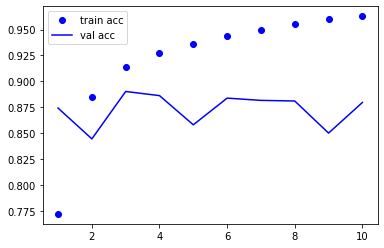

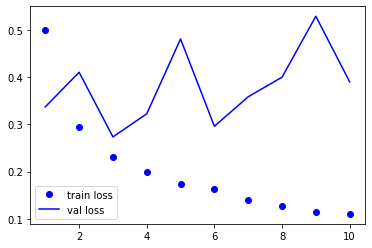

In [12]:
import matplotlib.pyplot as plt

acc=history.history["acc"]
val_acc=history.history["val_acc"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, "bo", label="train acc")
plt.plot(epochs, val_acc, "b", label="val acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="train loss")
plt.plot(epochs, val_loss, "b", label="val loss")
plt.legend()

plt.show()

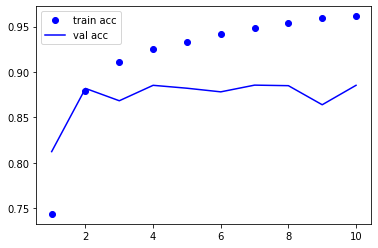

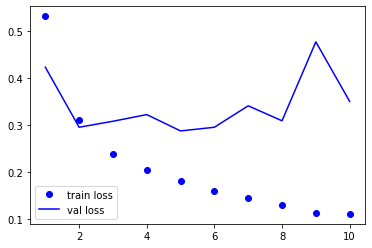

In [15]:
import matplotlib.pyplot as plt

acc=history.history["acc"]
val_acc=history.history["val_acc"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, "bo", label="train acc")
plt.plot(epochs, val_acc, "b", label="val acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="train loss")
plt.plot(epochs, val_loss, "b", label="val loss")
plt.legend()

plt.show()